In [52]:
import torch
import torch.nn as nn
from torch.func import jacrev, jacfwd, vmap

import numpy as np
import matplotlib.pyplot as plt # need 3.10 plus for "berlin" cmap
import matplotlib.colors as mcolors

3.9.2


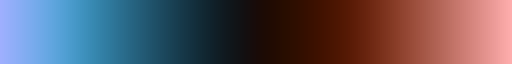

In [75]:
# Generate Berlin colormap although it is only available in Matplotlib 3.10
print(matplotlib.__version__)

_berlin_data = [
    [0.62108, 0.69018, 0.99951],
    [0.61216, 0.68923, 0.99537],
    [0.6032, 0.68825, 0.99124],
    [0.5942, 0.68726, 0.98709],
    [0.58517, 0.68625, 0.98292],
    [0.57609, 0.68522, 0.97873],
    [0.56696, 0.68417, 0.97452],
    [0.55779, 0.6831, 0.97029],
    [0.54859, 0.68199, 0.96602],
    [0.53933, 0.68086, 0.9617],
    [0.53003, 0.67969, 0.95735],
    [0.52069, 0.67848, 0.95294],
    [0.51129, 0.67723, 0.94847],
    [0.50186, 0.67591, 0.94392],
    [0.49237, 0.67453, 0.9393],
    [0.48283, 0.67308, 0.93457],
    [0.47324, 0.67153, 0.92975],
    [0.46361, 0.6699, 0.92481],
    [0.45393, 0.66815, 0.91974],
    [0.44421, 0.66628, 0.91452],
    [0.43444, 0.66427, 0.90914],
    [0.42465, 0.66212, 0.90359],
    [0.41482, 0.65979, 0.89785],
    [0.40498, 0.65729, 0.89191],
    [0.39514, 0.65458, 0.88575],
    [0.3853, 0.65167, 0.87937],
    [0.37549, 0.64854, 0.87276],
    [0.36574, 0.64516, 0.8659],
    [0.35606, 0.64155, 0.8588],
    [0.34645, 0.63769, 0.85145],
    [0.33698, 0.63357, 0.84386],
    [0.32764, 0.62919, 0.83602],
    [0.31849, 0.62455, 0.82794],
    [0.30954, 0.61966, 0.81963],
    [0.30078, 0.6145, 0.81111],
    [0.29231, 0.60911, 0.80238],
    [0.2841, 0.60348, 0.79347],
    [0.27621, 0.59763, 0.78439],
    [0.26859, 0.59158, 0.77514],
    [0.26131, 0.58534, 0.76578],
    [0.25437, 0.57891, 0.7563],
    [0.24775, 0.57233, 0.74672],
    [0.24146, 0.5656, 0.73707],
    [0.23552, 0.55875, 0.72735],
    [0.22984, 0.5518, 0.7176],
    [0.2245, 0.54475, 0.7078],
    [0.21948, 0.53763, 0.698],
    [0.21469, 0.53043, 0.68819],
    [0.21017, 0.52319, 0.67838],
    [0.20589, 0.5159, 0.66858],
    [0.20177, 0.5086, 0.65879],
    [0.19788, 0.50126, 0.64903],
    [0.19417, 0.4939, 0.63929],
    [0.19056, 0.48654, 0.62957],
    [0.18711, 0.47918, 0.6199],
    [0.18375, 0.47183, 0.61024],
    [0.1805, 0.46447, 0.60062],
    [0.17737, 0.45712, 0.59104],
    [0.17426, 0.44979, 0.58148],
    [0.17122, 0.44247, 0.57197],
    [0.16824, 0.43517, 0.56249],
    [0.16529, 0.42788, 0.55302],
    [0.16244, 0.42061, 0.5436],
    [0.15954, 0.41337, 0.53421],
    [0.15674, 0.40615, 0.52486],
    [0.15391, 0.39893, 0.51552],
    [0.15112, 0.39176, 0.50623],
    [0.14835, 0.38459, 0.49697],
    [0.14564, 0.37746, 0.48775],
    [0.14288, 0.37034, 0.47854],
    [0.14014, 0.36326, 0.46939],
    [0.13747, 0.3562, 0.46024],
    [0.13478, 0.34916, 0.45115],
    [0.13208, 0.34215, 0.44209],
    [0.1294, 0.33517, 0.43304],
    [0.12674, 0.3282, 0.42404],
    [0.12409, 0.32126, 0.41507],
    [0.12146, 0.31435, 0.40614],
    [0.1189, 0.30746, 0.39723],
    [0.11632, 0.30061, 0.38838],
    [0.11373, 0.29378, 0.37955],
    [0.11119, 0.28698, 0.37075],
    [0.10861, 0.28022, 0.362],
    [0.10616, 0.2735, 0.35328],
    [0.10367, 0.26678, 0.34459],
    [0.10118, 0.26011, 0.33595],
    [0.098776, 0.25347, 0.32734],
    [0.096347, 0.24685, 0.31878],
    [0.094059, 0.24026, 0.31027],
    [0.091788, 0.23373, 0.30176],
    [0.089506, 0.22725, 0.29332],
    [0.087341, 0.2208, 0.28491],
    [0.085142, 0.21436, 0.27658],
    [0.083069, 0.20798, 0.26825],
    [0.081098, 0.20163, 0.25999],
    [0.07913, 0.19536, 0.25178],
    [0.077286, 0.18914, 0.24359],
    [0.075571, 0.18294, 0.2355],
    [0.073993, 0.17683, 0.22743],
    [0.07241, 0.17079, 0.21943],
    [0.071045, 0.1648, 0.2115],
    [0.069767, 0.1589, 0.20363],
    [0.068618, 0.15304, 0.19582],
    [0.06756, 0.14732, 0.18812],
    [0.066665, 0.14167, 0.18045],
    [0.065923, 0.13608, 0.17292],
    [0.065339, 0.1307, 0.16546],
    [0.064911, 0.12535, 0.15817],
    [0.064636, 0.12013, 0.15095],
    [0.064517, 0.11507, 0.14389],
    [0.064554, 0.11022, 0.13696],
    [0.064749, 0.10543, 0.13023],
    [0.0651, 0.10085, 0.12357],
    [0.065383, 0.096469, 0.11717],
    [0.065574, 0.092338, 0.11101],
    [0.065892, 0.088201, 0.10498],
    [0.066388, 0.084134, 0.099288],
    [0.067108, 0.080051, 0.093829],
    [0.068193, 0.076099, 0.08847],
    [0.06972, 0.072283, 0.083025],
    [0.071639, 0.068654, 0.077544],
    [0.073978, 0.065058, 0.07211],
    [0.076596, 0.061657, 0.066651],
    [0.079637, 0.05855, 0.061133],
    [0.082963, 0.055666, 0.055745],
    [0.086537, 0.052997, 0.050336],
    [0.090315, 0.050699, 0.04504],
    [0.09426, 0.048753, 0.039773],
    [0.098319, 0.047041, 0.034683],
    [0.10246, 0.045624, 0.030074],
    [0.10673, 0.044705, 0.026012],
    [0.11099, 0.043972, 0.022379],
    [0.11524, 0.043596, 0.01915],
    [0.11955, 0.043567, 0.016299],
    [0.12381, 0.043861, 0.013797],
    [0.1281, 0.044459, 0.011588],
    [0.13232, 0.045229, 0.0095315],
    [0.13645, 0.046164, 0.0078947],
    [0.14063, 0.047374, 0.006502],
    [0.14488, 0.048634, 0.0053266],
    [0.14923, 0.049836, 0.0043455],
    [0.15369, 0.050997, 0.0035374],
    [0.15831, 0.05213, 0.0028824],
    [0.16301, 0.053218, 0.0023628],
    [0.16781, 0.05424, 0.0019629],
    [0.17274, 0.055172, 0.001669],
    [0.1778, 0.056018, 0.0014692],
    [0.18286, 0.05682, 0.0013401],
    [0.18806, 0.057574, 0.0012617],
    [0.19323, 0.058514, 0.0012261],
    [0.19846, 0.05955, 0.0012271],
    [0.20378, 0.060501, 0.0012601],
    [0.20909, 0.061486, 0.0013221],
    [0.21447, 0.06271, 0.0014116],
    [0.2199, 0.063823, 0.0015287],
    [0.22535, 0.065027, 0.0016748],
    [0.23086, 0.066297, 0.0018529],
    [0.23642, 0.067645, 0.0020675],
    [0.24202, 0.069092, 0.0023247],
    [0.24768, 0.070458, 0.0026319],
    [0.25339, 0.071986, 0.0029984],
    [0.25918, 0.07364, 0.003435],
    [0.265, 0.075237, 0.0039545],
    [0.27093, 0.076965, 0.004571],
    [0.27693, 0.078822, 0.0053006],
    [0.28302, 0.080819, 0.0061608],
    [0.2892, 0.082879, 0.0071713],
    [0.29547, 0.085075, 0.0083494],
    [0.30186, 0.08746, 0.0097258],
    [0.30839, 0.089912, 0.011455],
    [0.31502, 0.09253, 0.013324],
    [0.32181, 0.095392, 0.015413],
    [0.32874, 0.098396, 0.01778],
    [0.3358, 0.10158, 0.020449],
    [0.34304, 0.10498, 0.02344],
    [0.35041, 0.10864, 0.026771],
    [0.35795, 0.11256, 0.030456],
    [0.36563, 0.11666, 0.034571],
    [0.37347, 0.12097, 0.039115],
    [0.38146, 0.12561, 0.043693],
    [0.38958, 0.13046, 0.048471],
    [0.39785, 0.13547, 0.053136],
    [0.40622, 0.1408, 0.057848],
    [0.41469, 0.14627, 0.062715],
    [0.42323, 0.15198, 0.067685],
    [0.43184, 0.15791, 0.073044],
    [0.44044, 0.16403, 0.07862],
    [0.44909, 0.17027, 0.084644],
    [0.4577, 0.17667, 0.090869],
    [0.46631, 0.18321, 0.097335],
    [0.4749, 0.18989, 0.10406],
    [0.48342, 0.19668, 0.11104],
    [0.49191, 0.20352, 0.11819],
    [0.50032, 0.21043, 0.1255],
    [0.50869, 0.21742, 0.13298],
    [0.51698, 0.22443, 0.14062],
    [0.5252, 0.23154, 0.14835],
    [0.53335, 0.23862, 0.15626],
    [0.54144, 0.24575, 0.16423],
    [0.54948, 0.25292, 0.17226],
    [0.55746, 0.26009, 0.1804],
    [0.56538, 0.26726, 0.18864],
    [0.57327, 0.27446, 0.19692],
    [0.58111, 0.28167, 0.20524],
    [0.58892, 0.28889, 0.21362],
    [0.59672, 0.29611, 0.22205],
    [0.60448, 0.30335, 0.23053],
    [0.61223, 0.31062, 0.23905],
    [0.61998, 0.31787, 0.24762],
    [0.62771, 0.32513, 0.25619],
    [0.63544, 0.33244, 0.26481],
    [0.64317, 0.33975, 0.27349],
    [0.65092, 0.34706, 0.28218],
    [0.65866, 0.3544, 0.29089],
    [0.66642, 0.36175, 0.29964],
    [0.67419, 0.36912, 0.30842],
    [0.68198, 0.37652, 0.31722],
    [0.68978, 0.38392, 0.32604],
    [0.6976, 0.39135, 0.33493],
    [0.70543, 0.39879, 0.3438],
    [0.71329, 0.40627, 0.35272],
    [0.72116, 0.41376, 0.36166],
    [0.72905, 0.42126, 0.37062],
    [0.73697, 0.4288, 0.37962],
    [0.7449, 0.43635, 0.38864],
    [0.75285, 0.44392, 0.39768],
    [0.76083, 0.45151, 0.40675],
    [0.76882, 0.45912, 0.41584],
    [0.77684, 0.46676, 0.42496],
    [0.78488, 0.47441, 0.43409],
    [0.79293, 0.48208, 0.44327],
    [0.80101, 0.48976, 0.45246],
    [0.80911, 0.49749, 0.46167],
    [0.81722, 0.50521, 0.47091],
    [0.82536, 0.51296, 0.48017],
    [0.83352, 0.52073, 0.48945],
    [0.84169, 0.52853, 0.49876],
    [0.84988, 0.53634, 0.5081],
    [0.85809, 0.54416, 0.51745],
    [0.86632, 0.55201, 0.52683],
    [0.87457, 0.55988, 0.53622],
    [0.88283, 0.56776, 0.54564],
    [0.89111, 0.57567, 0.55508],
    [0.89941, 0.58358, 0.56455],
    [0.90772, 0.59153, 0.57404],
    [0.91603, 0.59949, 0.58355],
    [0.92437, 0.60747, 0.59309],
    [0.93271, 0.61546, 0.60265],
    [0.94108, 0.62348, 0.61223],
    [0.94945, 0.63151, 0.62183],
    [0.95783, 0.63956, 0.63147],
    [0.96622, 0.64763, 0.64111],
    [0.97462, 0.65572, 0.65079],
    [0.98303, 0.66382, 0.66049],
    [0.99145, 0.67194, 0.67022],
    [0.99987, 0.68007, 0.67995]]

from matplotlib.colors import ListedColormap

cmaps = {
    name: ListedColormap(data, name = name) for name, data in [
        ('berlin', _berlin_data),
    ]}

cmaps['berlin']

In [54]:
def set_seed(seed = 42):
    np.random.seed(seed)            # NumPy
    torch.manual_seed(seed)         # PyTorch CPU
    torch.cuda.manual_seed(seed)    # PyTorch GPU (single-GPU)

# Set seed before initializing the model
set_seed(42)

# Matrix field reconstruction

The **matrix field reconstruction** has one less Jacobian step than the **vector field reconstruction** which is why it is computationally more efficient.

We use the following deterministic transformations to get from the NN output to a divergence-free vector field v:
1. Parameterise the Skew-Symmetric decomposition of A
    - **U_topright = NN(x)** (non-zero values U_topright (N x 1) for the Upper Triangular U (N x dims x dims). For 2D, the dimensionality of U_topright is just 1, but generally it is (dims(dims - 1)/2)).
2. Construct anti-symmetric matrix A
    - **A = U - U.T**
3. Attain divergence-free vector field v via row-wise Jacobians
    - **v = (div(A[0,:]), div(A[1,:]))**, trace of the Jacobian

To check that this is divergence free we need another Jacobian.

see https://github.com/facebookresearch/neural-conservation-law/blob/main/pytorch/divfree.py

Dimensionalities:
- If our input in (4 x 4, 2) so flat that is (16, 2) coordinate pairs, U_topright should be (16, 1)

## Questions

- Do we use a NN that processes a batch or points individually? (Batch)
- What is the output shape of u_v?
    - For the dim = 2 case, do it is always (dim * (dim - 1) / 2), which is 1 because we only estimate the upper right corner of every (N) 2 x 2 matrix
    - Can we build this directly into the net?

The model seems to only be implemented under [jax > models.py > Divfree()](https://github.com/facebookresearch/neural-conservation-law/blob/20a403d00affad905d1c47b041bc60d0ff0ea360/jax/models.py#L118). DivfreeSparse() and DivFreeImplicit() are not used anywhere.

The model is used in [jax > hh_experiment_DivFree.py](https://github.com/facebookresearch/neural-conservation-law/blob/20a403d00affad905d1c47b041bc60d0ff0ea360/jax/hh_experiment_DivFree.py#L53). Hodge decomp.

dim = 10.  
mlp = MLP(depth = layers, width = width, act = act, out_dim = **dim * (dim-1) // 2**, std = 1, bias = True)

For dim = 2, at each point, each matrix A (2 x 2) is antisymm. So we only have to estimate a scalar for each input point.

u_fn, params, _ = build_divfree_vector_field(self.module)

In [55]:
class MLP(nn.Module):
    def __init__(self, input_dim = 2, hidden_dim = 32):
        super().__init__()
        
        output_dim = int((input_dim * (input_dim - 1)) / 2)
        
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.net(x)  # Output shape: (4,)

In [56]:
model = MLP()

N = 16  # N should be a perfect square
N_side = int(N ** 0.5)

dims = 2

# inputs = torch.randn(N, dims)  # Random (N, 2) inputs
xy_side = torch.linspace(0, 1, N_side)
# torch meshgrid, not default but we want to index by x, y
X_mesh, Y_mesh = torch.meshgrid(xy_side, xy_side, indexing = "xy")
# Construct flat pairs of points
inputs = torch.cat([X_mesh.reshape(-1, 1), Y_mesh.reshape(-1, 1)], dim = 1)
print(inputs.shape)

torch.Size([16, 2])


In [57]:
# write this as a function because we need to input a function for the Jacobian calculation
def compute_A(x):
    # U_fill is (N, 1), which is the model output, fills upper right corner of all 2x2 matrices
    U_fill = model(x)
    N = int(x.shape[0])

    # This version works with vmap, diagonal shifts diagional one up
    U_zero_one = torch.triu(torch.ones(N, dims, dims), diagonal = 1)
    # U_zero_one is (N, 2, 2), U_fill is (N, 1), so we need to unsqueeze the first dim of U_fill
    U = U_zero_one * U_fill.unsqueeze(1)
    # result is the same as U[:, 0, 1] = U_fill.squeeze()
    # alternative might be torch.index_add
    # U is (N, 2, 2), so we need to swap the last two dims and then subtract
    A = U - U.transpose(1, 2)
    return A

In [59]:
def compute_v(x):
    # Compute the Jacobian of A 
    jacobian_A = vmap(jacfwd(compute_A))(inputs)
    # assert that the second dim (size N) is redundant
    assert(jacobian_A[:, 0, : , :, :] == jacobian_A[:, -1, : , :, :]).any()
    # remove this redundant dimension
    jacobian_A_lean = jacobian_A[:, 0, : , :, :]
    # print(jacobian_A_lean.shape): torch.Size([N, 2, 2, 2])
    # dim1 is what is considered the rows, dim2 is what is considered the columns
    # So we compute this over the last two dims because the Jacobian is N x two (2 x 2)
    v = torch.diagonal(jacobian_A_lean, dim1 = -2, dim2 = -1).sum(dim = 1)
    # diagonal returns torch.Size([16, 2, 2]) so now we sum over the middle dim
    return v

In [ ]:
def div(x):
    # print(jacobian_v.shape): torch.Size([16, 16, 2, 2])
    jacobian_v = vmap(jacfwd(compute_v))(x)
    # assert that the second dim (size N) is redundant
    assert(jacobian_v[:, 0, :, :] == jacobian_v[:, -1, :, :]).any()
    # print(jacobian_v_lean.shape): torch.Size([16, 2, 2])
    jacobian_v_lean = jacobian_v[:, 0, :, :]
    # torch.Size([16, 2]) and then we sum over the last dim to combine div_x and div_y
    # attain flat divergence field 
    div_flat = torch.diagonal(jacobian_v_lean, dim1 = -2, dim2 = -1).sum(dim = -1)
    return div_flat

# div_v = div(inputs)

In [80]:
def visualise_v(v, div_v, x, title_string = "v(x)", color_abs_max = 0.5):
    """Plots a vector field v(x) and its divergence div_v(x) as a streamplot on a square grid.
    The linewidth corresponds to the magnitude/speed of the vector field.
    The color corresponds to the divergence of the vector field. We use the dark doiverging colormap "berlin" so that zero divergence is visible as black. 

    Args:
        v (torch.Size([N_long, 2])): flattened square vector field, where the first column is the u component and the second column is the v component
        div_v (torch.Size([N_long])): flat divergence of the vector field
        x (torch.Size([N_long, 2])): flattend meshgrids, where the first column is the x component and the second column is the y component
        title_string (str, optional): Title for plot. Defaults to "v(x)".
        color_abs_max (float, optional): Maximum absolute value for color normalization. Defaults to 0.5.
    """

    # Extract N_long and calculate sqrt of N_long, N_side
    N_long = torch.tensor(v.shape[0])
    N_side = int(torch.sqrt(N_long))

    # Extract both columns/components from v and make square
    U = v[:, 0].reshape(N_side, N_side)
    V = v[:, 1].reshape(N_side, N_side)

    # Make coordinates square again
    X = x[:, 0].reshape(N_side, N_side)
    Y = x[:, 1].reshape(N_side, N_side)

    div_v_square = div_v.reshape(N_side, N_side)
    # Define symmetric normalization with zero centered
    norm = mcolors.TwoSlopeNorm(vmin = - color_abs_max, vcenter = 0, vmax = color_abs_max)

    # Magnitude i.e. speed: square each element to remove negative direction, then square root
    mag = torch.sqrt(torch.square(U) + torch.square(V))
    lw_scalar = 2
    lw = mag * lw_scalar / torch.max(mag) # normalise mag

    fig, ax = plt.subplots(1, 1, figsize = (4, 4))

    ax.streamplot(X.numpy(), Y.numpy(), U.numpy(), V.numpy(), 
                  linewidth = lw.numpy(),
                  color = div_v_square.numpy(), 
                  cmap = cmaps['berlin'],
                  norm = norm)
    
    # coolwarm is diverging but has grey in middle
    # add norm
    ax.set_aspect(1)
    ax.set_title(title_string)

    plt.show()

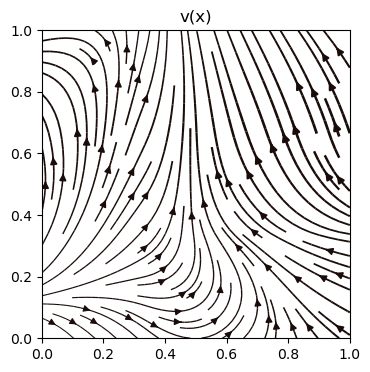

In [82]:
v = compute_v(inputs)
div_v = div(inputs)

visualise_v(v.detach(), div_v.detach(), inputs, title_string = "v(x)", color_abs_max = 0.5)

In [62]:
# Jacobian w.r.t. v throughs issues if x is a variable in compute_v

## Jacobian headache

- Jacobian is probably among the most expensive functions
- [torch.func.jacrev](https://pytorch.org/docs/stable/generated/torch.func.jacrev.html#torch.func.jacrev)
    - The implementation goes forward
    - torch.func.jacobian chooses based on efficiency
- batched Jacobians via vmap
- consider # _func_sum
- torch.autograd.functional.jacobian(f, x)
    - not as fast as func
- Shape torch.Size([16, 2, 2, 2])
    - for every i in N we have 2 (two) 2 x 2 matrices

In [63]:
x = torch.randn(5, 2, 2)
jacobian_vmap = vmap(jacrev(torch.sin))(x)
print(jacobian_vmap.shape)

jacobian = jacrev(torch.sin)(x)
print(jacobian.shape)

torch.Size([5, 2, 2, 2, 2])
torch.Size([5, 2, 2, 5, 2, 2])


In [64]:
# Issue with how we construct U 
# Jacobian: torch.Size([16, 16, 2, 2, 2])
# without vmap it was also torch.Size([16, 2, 2, 16, 2])
jacobian = vmap(jacfwd(compute_A))(inputs)
print(jacobian.shape)

# Remove redundant dim
# (jacobian[:, 0, : , :, :] == jacobian[:, 15, : , :, :]).any()
assert(jacobian[:, 0, : , :, :] == jacobian[:, -1, : , :, :]).any()
#jacobian_sq = jacobian[:, 0, : , :, :]
#jacobian_sq.shape

torch.Size([16, 2, 2, 2, 2])
